# Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly
competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.

# Objectives:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e.,
churn phase). By knowing this, the company can take action steps such as providing special
plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables
may also indicate why customers choose to switch to other networks.

Even though overall accuracy will be your primary evaluation metric, you should also mention
other metrics like precision, recall, etc. for the different models that can be used for evaluation
purposes based on different business objectives.




In [130]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries

In [131]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
import xgboost as xgb  # Load this xgboost


# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None


# Reading and understanding the data

In [132]:
# Importing all datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [133]:
train.head()



,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [134]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [136]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [137]:
train.shape

(69999, 172)

In [138]:
test.shape

(30000, 171)

# Checking and imputation of missing Values

In [139]:
# Checking the missing values
round(train.isnull().sum()/len(train.index),2).sort_values(ascending=False)

arpu_3g_6                   0.75
av_rech_amt_data_6          0.75
count_rech_2g_6             0.75
total_rech_data_6           0.75
count_rech_3g_6             0.75
fb_user_6                   0.75
max_rech_data_6             0.75
date_of_last_rech_data_6    0.75
night_pck_user_6            0.75
arpu_2g_6                   0.75
arpu_2g_8                   0.74
fb_user_7                   0.74
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
night_pck_user_7            0.74
fb_user_8                   0.74
total_rech_data_7           0.74
total_rech_data_8           0.74
max_rech_data_7             0.74
count_rech_3g_7             0.74
count_rech_2g_8             0.74
arpu_3g_7                   0.74
arpu_3g_8                   0.74
arpu_2g_7                   0.74
av_rech_amt_data_8          0.74
av_rech_amt_data_7          0.74
count_rech_3g_8             0.74
night_pck_user_8            0.74
count_rech_2g_7             0.74
max_rech_data_8             0.74
std_ic_t2f

In [140]:
all_columns=train.columns
date_columns=[x for x in all_columns if 'date' in x]
numeric_columns=[x for x in all_columns if x not in date_columns]

In [141]:
# Code to convert null values to 0 for all numeric columns
train[numeric_columns]=train[numeric_columns].fillna(0)

In [142]:
from datetime import date,datetime

train['last_date_of_month_7']=train['last_date_of_month_7'].fillna('7/31/2014')
train['last_date_of_month_8']=train['last_date_of_month_8'].fillna('8/31/2014')

train[date_columns]=train[date_columns].fillna(datetime.strptime(str(date.max), '%Y-%m-%d').strftime('%m/%d/%Y'))

In [143]:
# Code for column-wise null percentage
round(100*(train[date_columns].isnull().sum()/len(train[date_columns].index)), 2)

last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
date_of_last_rech_6         0.0
date_of_last_rech_7         0.0
date_of_last_rech_8         0.0
date_of_last_rech_data_6    0.0
date_of_last_rech_data_7    0.0
date_of_last_rech_data_8    0.0
dtype: float64

In [144]:
# checking for the presence of any more null values
train.isnull().values.any()

False

### New Feature Creation for train dataset
Now we have values for 'total_rechdata' and 'av_rech_amtdata' (for months 6,7 & 8). Using these 2 values we can derive 
new feature for the respective months called total_data_rechamt which equals total_rechdata * av_rech_amtdata

Also this new feature would help in computing the total data recharge amount - 'total_data_rechamt' for the months 6, 7, 8 

In [145]:
train['total_data_rech_amt_6'] = train['total_rech_data_6'] * train['av_rech_amt_data_6']
train['total_data_rech_amt_7'] = train['total_rech_data_7'] * train['av_rech_amt_data_7']
train['total_data_rech_amt_8'] = train['total_rech_data_8'] * train['av_rech_amt_data_8']
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,12/31/9999,12/31/9999,12/31/9999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,0.0,0.0,0.0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12

In [146]:
train['total_rech_6'] = train['total_data_rech_amt_6'] + train['total_rech_amt_6']
train['total_rech_7'] = train['total_data_rech_amt_7'] + train['total_rech_amt_7']
train['total_rech_8'] = train['total_data_rech_amt_8'] + train['total_rech_amt_8']

### New Feature Creation for test dataset

### Filering High value customers for train dataset

In [147]:
## Average recharge amount for June + July
train['total_rech_6_7'] = train['total_rech_6'] + train['total_rech_7']
round(train['total_rech_6_7'].mean(), 2)

971.52

In [148]:
## 75th Percentile of average recharge amount for June + July

train['total_rech_6_7'].quantile(0.75)

1106.0

In [149]:
## Getting high value customers
len(train[(train['total_rech_6_7']>=train['total_rech_6_7'].quantile(0.75))])

17521

In [150]:
## Filtering based on 0.75 quantile

train = train[(train['total_rech_6_7'] >= train['total_rech_6_7'].quantile(0.75))]
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.0,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0

In [151]:
train.shape

(17521, 179)

In [152]:
# Reset the dataframe indexes

train = train.reset_index(drop=True)
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7
0,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.0,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0,1515.0,1473.0,974.0,2988.0
1,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.0,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.

In [153]:
#Drop unwanted columns like fb_user_6, fb_user_7 fb_user_8
train = train.drop(columns=['fb_user_6','fb_user_7','fb_user_8',])


In [154]:
## Drop un wanted columns which will not add value for modelling
train = train.drop(columns=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])

In [155]:
train.shape

(17521, 170)

In [156]:
train.max()

id                              69994
circle_id                         109
loc_og_t2o_mou                    0.0
std_og_t2o_mou                    0.0
loc_ic_t2o_mou                    0.0
last_date_of_month_6        6/30/2014
last_date_of_month_7        7/31/2014
last_date_of_month_8        8/31/2014
arpu_6                      27731.088
arpu_7                      35145.834
arpu_8                      33543.624
roam_ic_mou_6                 2613.31
roam_ic_mou_7                 3813.29
roam_ic_mou_8                 4169.81
roam_og_mou_6                 3775.11
roam_og_mou_7                 2812.04
roam_og_mou_8                 5337.04
loc_og_t2t_mou_6              6431.33
loc_og_t2t_mou_7              7400.66
loc_og_t2t_mou_8             10752.56
loc_og_t2m_mou_6              4696.83
loc_og_t2m_mou_7              4557.14
loc_og_t2m_mou_8              4961.33
loc_og_t2f_mou_6               617.58
loc_og_t2f_mou_7               815.33
loc_og_t2f_mou_8               576.54
loc_og_t2c_m

In [157]:
## Dropping columns with all values as 0
train = train.drop(columns=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], axis=1)


In [158]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (train['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 20


In [159]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (train['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 32


In [160]:
# Index where the arpu values for month 8 are less than 0 -

arpu_8_index = (train['arpu_8'] < 0)
    
# Total number of such observations for month 8 -
print('Total observations with negative arpu values for month 8 -', arpu_8_index.sum())

Total observations with negative arpu values for month 8 - 53


In [161]:
# Let's delete the observations with negative arpu values. 

train = train[(train['arpu_6'] >= 0) & (train['arpu_7'] >= 0) & (train['arpu_8'] >= 0)]

In [162]:
train.shape

(17418, 161)

In [163]:
train['roam_any_6'] = train[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
train['roam_any_7'] = train[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
train['roam_any_8'] = train[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)

In [164]:
train['roam_any_6'] = train['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
train['roam_any_7'] = train['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
train['roam_any_8'] = train['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)

In [165]:
## Drop columns containing values for roam ic or roam og

train = train.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])


In [166]:
## Add all local ic and og columns and add a new column which says if local value is true for data
train['local_any_6'] = train[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
train['local_any_7'] = train[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
train['local_any_8'] = train[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)




In [167]:
train['local_any_6'] = train['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
train['local_any_7'] = train['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
train['local_any_8'] = train['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)


In [168]:
train = train.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])


In [169]:
## Add all std ic and og columns and add a new column which says if std value is true for data
train['std_any_6'] = train[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
train['std_any_7'] = train[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
train['std_any_8'] = train[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)




In [170]:
train['std_any_6'] = train['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
train['std_any_7'] = train['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
train['std_any_8'] = train['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)

In [171]:
train = train.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])


In [172]:
## Add all isd & spl ic and og columns and add a new column which says if spl value is true for data
train['spl_any_6'] = train[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
train['spl_any_7'] = train[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
train['spl_any_8'] = train[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)





In [173]:
train['spl_any_6'] = train['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
train['spl_any_7'] = train['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
train['spl_any_8'] = train['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)


In [174]:
train = train.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6','spl_og_mou_7', 
                            'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 
                            'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 
                            'ic_others_8'])


In [175]:
## max column will be removed as we already have total recharge column 
train = train.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'])


In [176]:
## Removing 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'
## Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 

train = train.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'])


In [177]:
## Data used 2g and 3g
train['data_used_6'] = train[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
train['data_used_7'] = train[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
train['data_used_8'] = train[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
train = train.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 
                            'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'])
train.head()


,id,circle_id,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,4,109,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,6.0,6.0,0.0,1.0,0.0,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,0,1515.0,1473.0,974.0,2988.0,1,0,0,1,1,1,1,0,0,0,1,0,390.80,308.89,213.47
1,15,109,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,5,3,4,654,400,652,6/27/2014,7/25/2014,8/30/2014,0,150,250,6/16/2014,12/31/9999,8/2/2014,1.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0,808.0,400.0,806.0,1208.0,0,0,0,1,1,1,0,1,1,1,0,0,260.42,0.00,354.35
2,23,109,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,26,19,10,1420,990,494,6/30/2014,7/31/2014,8/22/2014,110,50,30,12/31/9999,12/31/9999,12/31/9999,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0,1420.0,990.0,494.0,2410.0,0,0,0,1,1,1,1,0,0,1,1,1,0.00,0.00,0.00
3,27,109,6/30/2014,7/31/2014,8/31/2014,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,13,8,4,565,572,250,6/29/2014,7/20/2014,8/23/2014,110,200,61,6/17/2014,7/17/2014,8/12/2014,4.0,1.0,1.0,0.0,1.0,2.0,79.35,86.55,161.92,0.18,69.20,161.92,0.0,0.0,0.0,1,0,0,3,1,1,0,0,1,0,1,1,573,0,1385.0,1180.0,892.0,2565.0,0,0,0,1,1,1,1,0,1,0,0,0,554.41,554.02,2053.87
4,39,109,6/30/2014,7/31/2014,8/31/2014,348.187,630.031,974.914,102.49,938.03,1124.26,257.33,197.48,310.29,4,14,16,448,716,1127,6/29/2014,7/29/2014,8/30/2014,110,50,0,6/27/2014,7/12/2014,8/29/2014,2.0,1.0,1.0,0.0,0.0,1.0,0.00,0.00,212.17,0.01,0.00,250.42,0.0,0.0,0.0,2,1,1,0,0,0,0,0,1,0,0,0,622,0,1064.0,870.0,1981.0,1934.0,0,0,0,1,1,1,1,1,1,1,1,1,1884.40,1312.21,1476.89


In [178]:
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'
train = train.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 
                    'total_rech_amt_7', 'total_rech_amt_8'])


In [179]:
## Removing columns 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8'

train = train.drop(columns=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 
                            'count_rech_3g_7', 'count_rech_3g_8'])


In [180]:
train.columns

Index(['id', 'circle_id', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'churn_probability', 'total_rech_6', 'total_rech_7', 'total_rech_8',
       'total_rech_6_7', 'roam_any_6', 'roam_any_7', 'roam_an

In [181]:
train.shape

(17418, 65)

In [182]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
count,17418.000000,17418.0,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000,17418.000000
mean,34995.043001,109.0,597.690179,598.520975,538.238229,650.185762,665.761807,580.322632,296.936950,303.514570,286.938951,103.157997,103.191296,93.063440,75.951701,77.885814,69.893544,71.386595,72.953180,64.690026,0.014525,0.014181,0.012458,0.186187,0.196865,0.161959,1.212137,1.386784,1.171604,0.240900,0.254679,0.231427,0.243656,0.266334,0.231772,1211.028419,0.079286,1235.393433,1326.288772,1147.247109,2561.682205,0.226260,0.178838,0.190263,0.966299,0.969285,0.935182,0.860260,0.857044,0.822597,0.764382,0.751120,0.725973,708.073480,755.544873,700.486006
std,20172.624943,0.0,502.034827,527.217578,552.710649,731.416588,755.889880,732.143013,362.273396,368.030795,358.226098,141.431221,143.062369,137.402284,192.983817,197.286563,183.415617,171.359806,179.262259,163.152262,0.119645,0.118239,0.110923,0.452434,0.469299,0.416276,2.678942,2.963920,2.706713,0.645502,0.700078,0.651211,1.081560,1.197821,1.219903,953.615636,0.270192,1573.316782,1783.482091,1969.403685,2876.227150,0.418422,0.383228,0.392520,0.180463,0.172550,0.246212,0.346728,0.350038,0.382020,0.424397,0.432377,0.446035,1378.891942,1390.483801,1366.182398
min,4.000000,109.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.370000,-26.040000,-24.490000,-15.320000,-13.090000,-10.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,1106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17555.250000,109.0,329.149750,326.814000,242.180500,118.445000,118.865000,77.222500,78.015000,82.840000,66.367500,25.000000,23.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,464.000000,0.000000,617.000000,636.000000,438.000000,1370.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,34971.000000,109.0,522.874500,523.730000,456.382000,431.735000,443.235000,346.735000,189.355000,193.905000,180.555000,91.000000,59.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,856.000000,0.000000,877.000000,912.000000,756.000000,1796.0000

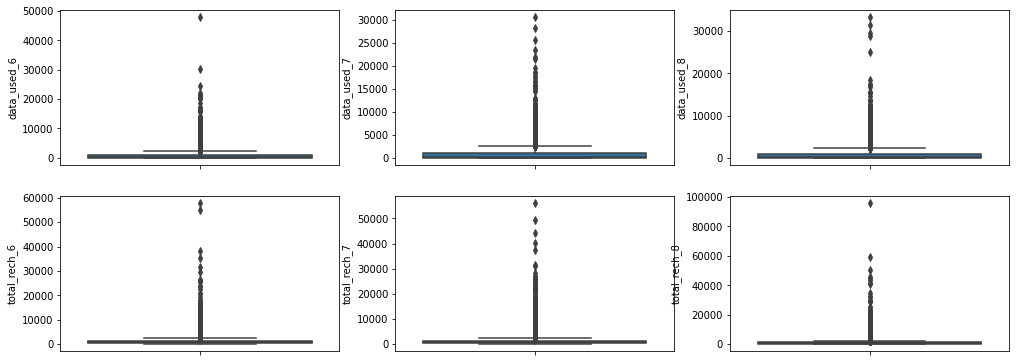

In [183]:
# Check the outliers by plotting boxplot for some  numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(6,3,1)
sns.boxplot(y = 'data_used_6', data = train)
plt.subplot(6,3,2)
sns.boxplot(y = 'data_used_7' , data = train)
plt.subplot(6,3,3)
sns.boxplot(y = 'data_used_8', data = train)
plt.subplot(6,3,4)
sns.boxplot(y = 'total_rech_6', data = train)
plt.subplot(6,3,5)
sns.boxplot(y = 'total_rech_7', data = train)
plt.subplot(6,3,6)
sns.boxplot(y = 'total_rech_8', data = train)

plt.show()

In [184]:
#IQR to handle outliers
# Selecting numerical columns
cols=train.select_dtypes(exclude='object').columns


Q1 = train[cols].quantile(0.05)
Q3 = train[cols].quantile(0.95)
IQR = Q3 - Q1

train = train[~((train[cols] < (Q1 - 1.5 * IQR)) |(train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [185]:
# Let's see the correlation matrix 


train.corr()


,id,circle_id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,churn_probability,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
id,1.000000,NaN,0.008653,0.010971,0.018235,-0.004247,0.000498,0.006329,0.009053,0.014704,0.014109,0.000469,0.016458,0.009440,0.008776,0.003487,0.000679,0.009933,0.001423,0.001086,NaN,NaN,NaN,-0.008605,0.001478,0.007109,-0.007629,-0.006651,-0.006610,0.009749,0.000719,-0.002513,-0.004515,-0.000958,0.011736,-0.002833,-0.006033,-0.005981,0.002568,0.005349,-0.001800,-0.002861,0.004523,-0.004846,NaN,NaN,-0.004004,-0.001116,-0.006606,-0.001093,0.009892,0.005036,0.011913,0.003278,-0.004530,0.011453
circle_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,0.008653,NaN,1.000000,0.624922,0.509205,0.721611,0.501084,0.416582,0.289331,0.224468,0.187500,0.233215,0.147053,0.162181,0.114888,0.002668,0.032553,0.090899,-0.025047,0.010213,NaN,NaN,NaN,-0.061588,-0.116312,-0.086852,-0.287726,-0.327981,-0.262837,0.072200,-0.017520,0.013187,-0.095609,-0.136203,-0.099416,0.051571,0.079705,0.372440,0.033602,0.088653,0.240076,0.086876,0.149706,0.147382,NaN,NaN,-0.065757,0.238895,0.224141,0.150234,0.134102,0.086093,0.055474,-0.071736,-0.133151,-0.115896
arpu_7,0.010971,NaN,0.624922,1.000000,0.682360,0.500202,0.712796,0.567617,0.195037,0.281540,0.233597,0.201477,0.259088,0.211367,0.004620,0.136910,0.067619,-0.019553,0.109487,0.047378,NaN,NaN,NaN,-0.119998,-0.056940,-0.075876,-0.326305,-0.296009,-0.251642,-0.000118,0.097503,0.043479,-0.134890,-0.093372,-0.101130,0.037558,0.016932,0.091708,0.322488,0.198036,0.266915,0.140117,0.122317,0.135115,NaN,NaN,0.046828,0.221718,0.250211,0.219908,0.063542,0.126699,0.103229,-0.145619,-0.044128,-0.066064
arpu_8,0.018235,NaN,0.509205,0.682360,1.000000,0.344984,0.496252,0.731180,0.201527,0.267093,0.358700,0.176630,0.245908,0.327029,0.032426,0.071526,0.204678,0.017797,0.053761,0.180520,NaN,NaN,NaN,-0.061974,-0.060543,0.019220,-0.260054,-0.245110,-0.159523,0.020653,0.048480,0.156161,-0.096620,-0.085628,-0.037784,0.095171,-0.192761,0.091772,0.178502,0.483172,0.171730,0.127072,0.036477,0.052032,NaN,NaN,0.250152,0.185955,0.200590,0.328082,0.053000,0.086949,0.213914,-0.090929,-0.039322,0.059154
total_og_mou_6,-0.004247,NaN,0.721611,0.500202,0.344984,1.000000,0.735142,0.577705,0.151196,0.085773,0.048782,0.065929,0.035149,0.017638,-0.164694,-0.169235,-0.149132,-0.178936,-0.178635,-0.157849,NaN,NaN,NaN,-0.172860,-0.177630,-0.164186,-0.256028,-0.263256,-0.216108,-0.139735,-0.149100,-0.135962,-0.133410,-0.137148,-0.113990,-0.056225,0.123025,0.137849,-0.043448,-0.030874,0.051899,-0.039826,0.107621,0.138411,NaN,NaN,-0.105230,0.245922,0.238047,0.136914,0.111464,0.074467,0.023809,-0.291917,-0.289398,-0.265473
total_og_mou_7,0.000498,NaN,0.501084,0.712796,0.496252,0.735142,1.000000,0.765000,0.062460,0.143175,0.093522,0.058715,0.089709,0.061358,-0.178387,-0.164039,-0.145165,-0.192818,-0.171553,-0.153639,NaN,NaN,NaN,-0.176999,-0.177733,-0.159367,-0.266512,-0.254627,-0.209028,-0.146410,-0.143253,-0.132938,-0.146809,-0.138037,-0.115735,-0.069441,0.061540,0.005599,0.071483,0.054650,0.050549,0.101258,0.009161,0.092703,NaN,NaN,0.022171,0.237517,0.256320,0.218433,0.049738,0.112684,0.087036,-0.307620,-0.290472,-0.263567
total_og_mou_8,0.006329,NaN,0.416582,0.567617,0.731180,0.577705,0.765000,1.0

In [186]:
train.select_dtypes(include='object').columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [187]:
#Removing variables which do not capture any variance
train=train.drop(['circle_id','last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],1)

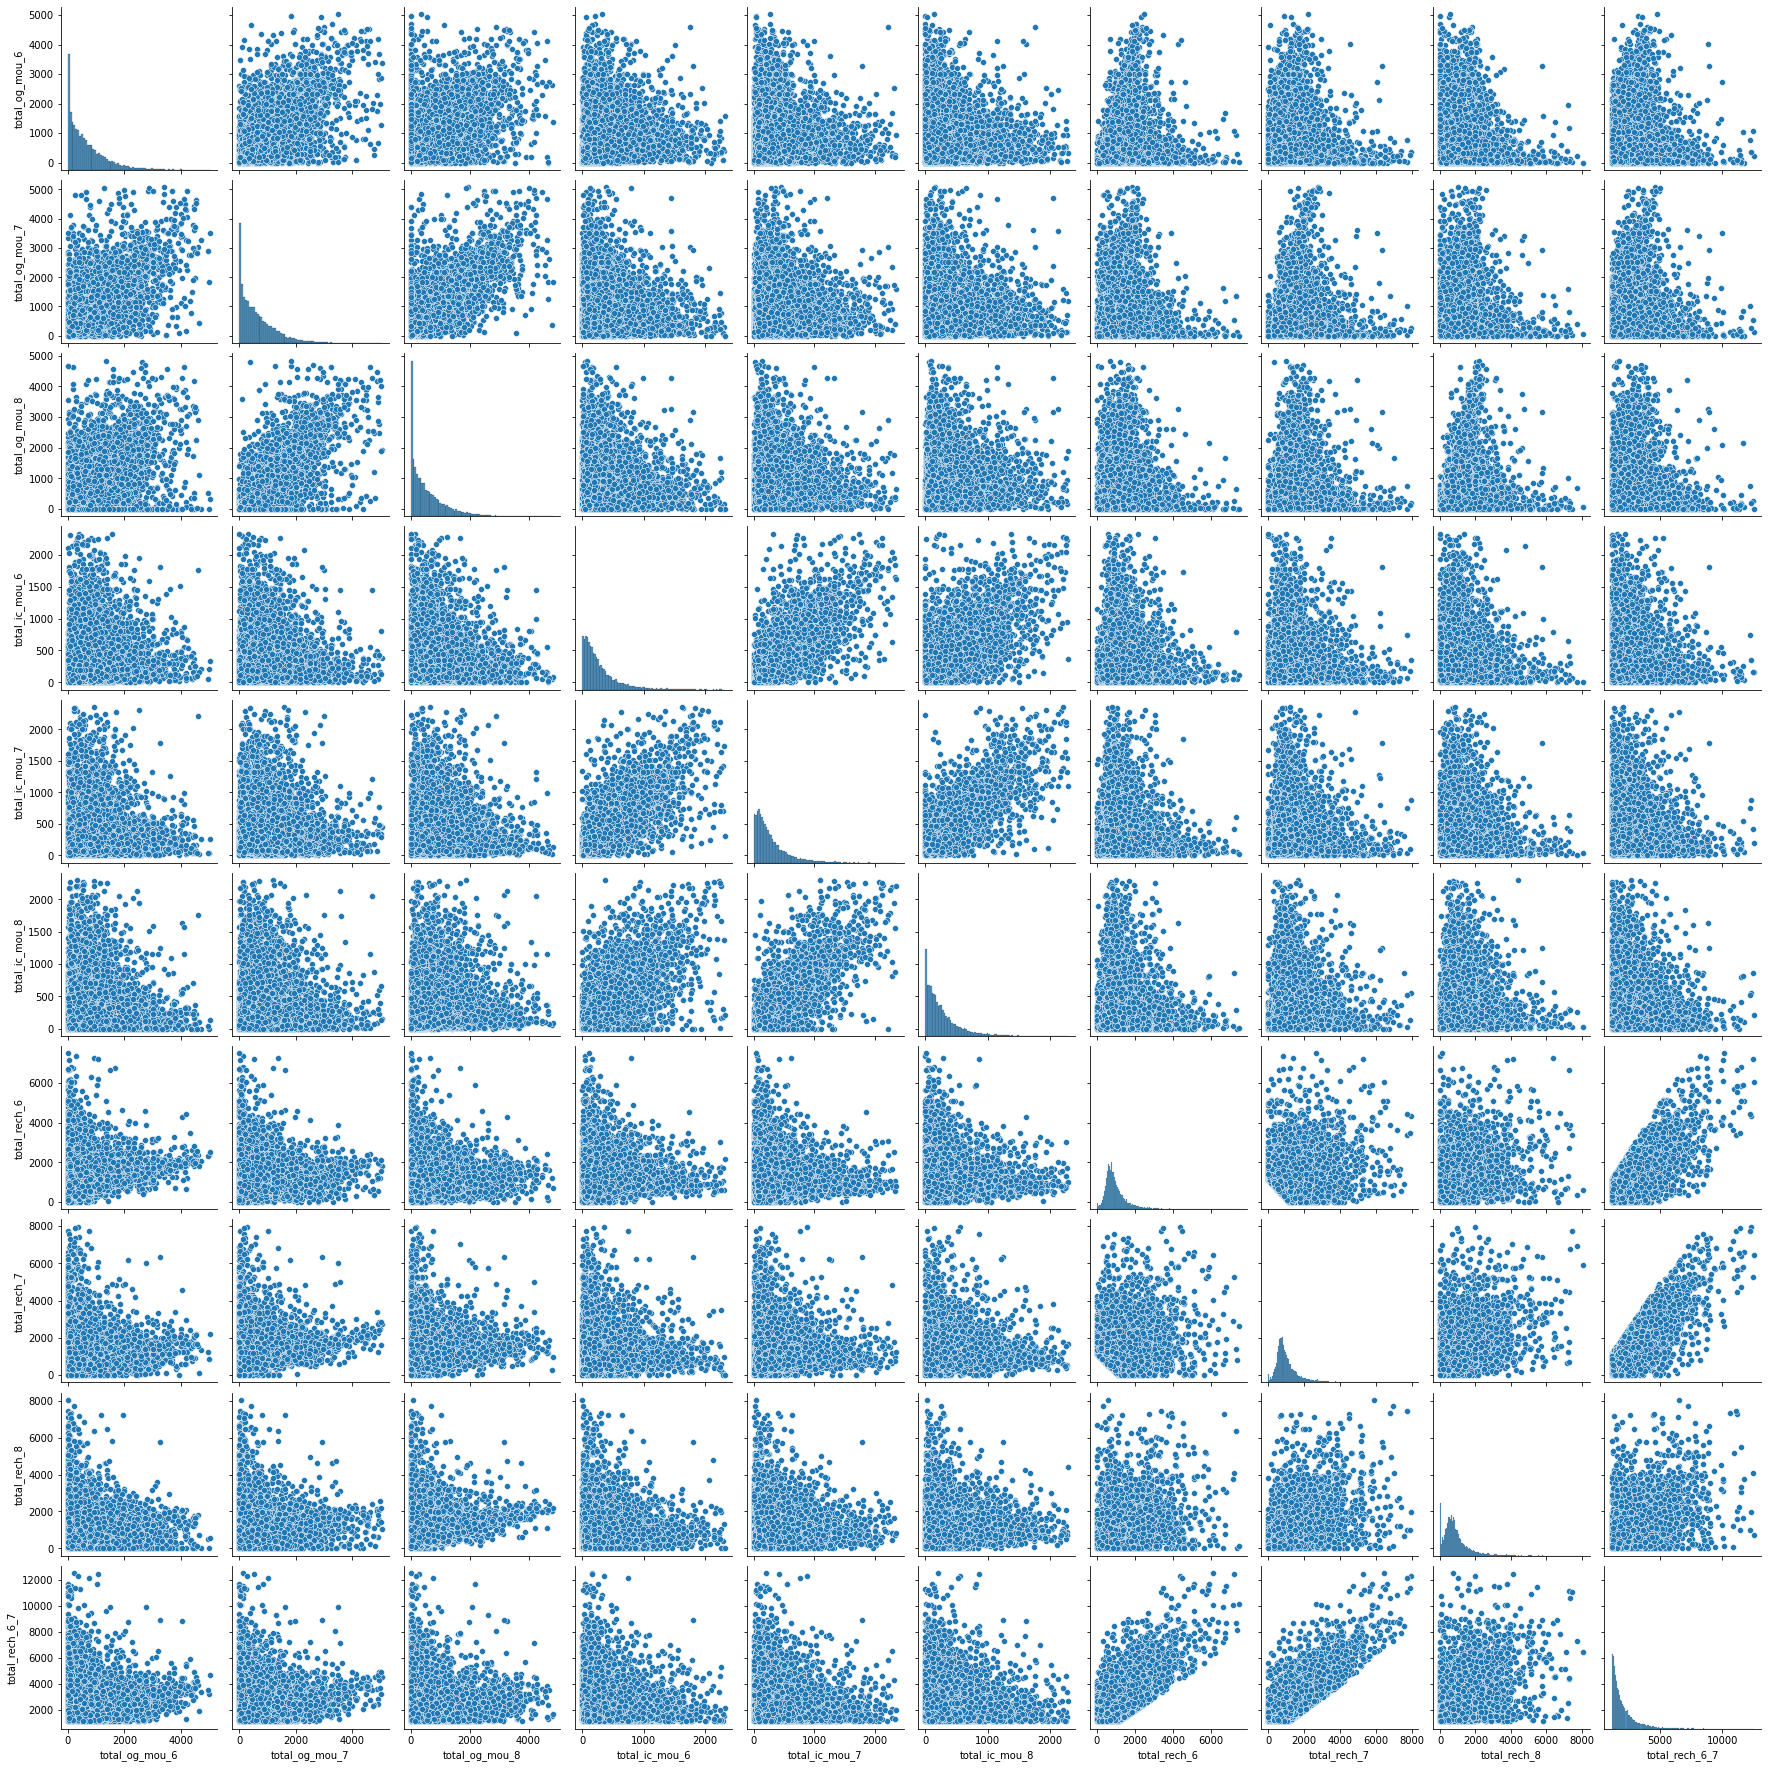

In [188]:
### EDA on derived variables.
# the commonly used alias for seaborn is sns
#import seaborn as sns

sns.pairplot(train[[x for x in train.columns if 'total' in x]])
plt.show()

In [189]:
### Checking the Churn Rate
churn = (sum(train['churn_probability'])/len(train['churn_probability'].index))*100
churn

6.843373493975903

In [190]:
X = train.drop(['churn_probability','id'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,25,10,30,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,647,1515.0,1473.0,974.0,2988.0,1,0,0,1,1,1,1,0,0,0,1,0,390.80,308.89,213.47
1,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,0,150,250,0.00,0.00,0.00,164.75,0.00,28.80,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,808.0,400.0,806.0,1208.0,0,0,0,1,1,1,0,1,1,1,0,0,260.42,0.00,354.35
2,1130.948,905.506,479.762,1152.99,822.83,387.81,598.54,448.36,203.29,110,50,30,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,1420.0,990.0,494.0,2410.0,0,0,0,1,1,1,1,0,0,1,1,1,0.00,0.00,0.00
3,390.489,350.985,421.300,141.74,170.21,195.51,283.48,366.03,350.86,110,200,61,79.35,86.55,161.92,0.18,69.20,161.92,0.0,0.0,0.0,1,0,0,3,1,1,0,0,1,0,1,1,573,1385.0,1180.0,892.0,2565.0,0,0,0,1,1,1,1,0,1,0,0,0,554.41,554.02,2053.87
4,348.187,630.031,974.914,102.49,938.03,1124.26,257.33,197.48,310.29,110,50,0,0.00,0.00,212.17,0.01,0.00,250.42,0.0,0.0,0.0,2,1,1,0,0,0,0,0,1,0,0,0,622,1064.0,870.0,1981.0,1934.0,0,0,0,1,1,1,1,1,1,1,1,1,1884.40,1312.21,1476.89


In [191]:
# Putting response variable to y
y = train['churn_probability']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: int64

In [192]:
# split into train and test
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

np.random.seed(0)
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [193]:
print(X_train.shape)
print(X_test.shape)

(18974, 53)
(4358, 53)


In [194]:
cols=X_train.columns
cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'total_rech_6', 'total_rech_7', 'total_rech_8', 'total_rech_6_7',
       'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7',
       'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6',
       'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8'],
      dtype='object')

In [195]:
col=X_test.columns
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'total_rech_6', 'total_rech_7', 'total_rech_8', 'total_rech_6_7',
       'roam_any_6', 'roam_any_7', 'roam_any_8', 'local_any_6', 'local_any_7',
       'local_any_8', 'std_any_6', 'std_any_7', 'std_any_8', 'spl_any_6',
       'spl_any_7', 'spl_any_8', 'data_used_6', 'data_used_7', 'data_used_8'],
      dtype='object')

In [196]:
#Scaling using MinMaxScaler
scaler=MinMaxScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[col] = scaler.transform(X_test[col])
X_train[cols].head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,0.209666,0.366402,0.241898,0.151654,0.146775,0.172540,0.177215,0.157731,0.186053,0.000000,0.108239,0.000000,0.015525,0.135441,0.146050,0.012098,0.129131,0.173943,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.052632,0.294118,0.0,0.4,0.5,0.0,0.0,0.0,0.739088,0.115754,0.289447,0.319959,0.184227,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.043035,0.062031,0.055647
1,0.190402,0.005493,0.227462,0.070046,0.004196,0.073911,0.076511,0.006860,0.088460,0.158320,0.000000,0.210016,0.023622,0.023813,0.119074,0.012098,0.012506,0.040896,0.0,0.0,0.0,0.0,0.0,1.0,0.235294,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.113933,0.226302,0.000000,0.266114,0.052547,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.131521,0.004529,0.389202
2,0.298496,0.547287,0.000000,0.110230,0.012412,0.000000,0.135028,0.021038,0.000000,0.193861,0.000000,0.000000,0.371269,0.023813,0.024405,0.257210,0.012506,0.011990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.318866,0.201202,0.185804,0.000000,0.167722,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.365558,0.035227,0.000000
3,0.367972,0.239923,0.215251,0.168773,0.104915,0.112014,0.429705,0.381075,0.331317,0.000000,0.000000,0.000000,0.015525,0.023813,0.024405,0.012098,0.012506,0.011990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.855980,0.082644,0.138191,0.071188,0.054688,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
4,0.134684,0.177604,0.105210,0.222963,0.263352,0.125011,0.081043,0.080373,0.064661,0.193861,0.193861,0.000000,0.015525,0.023813,0.024405,0.012098,0.012506,0.011990,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.077435,0.068892,0.086181,0.050997,0.008565,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000


In [197]:

X_test[col] = scaler.transform(X_test[col])

In [198]:
X_test.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
11474,0.000034,0.000034,0.000040,0.000005,0.000005,0.000012,0.000012,0.000004,0.000031,0.000000,0.000658,0.000467,0.015723,0.024012,0.024580,0.012378,0.012713,0.012205,0.0,0.0,0.0,0.0,0.0,0.00,0.00000,0.00000,0.000000,0.25,0.04,0.25,0.00,0.0,0.0,-0.044388,0.000012,0.000009,0.000010,-0.098670,0.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.000015,5.487055e-06,0.000021
13730,0.000073,0.000085,0.000101,0.000029,0.000062,0.000060,0.000099,0.000124,0.000093,0.000287,0.000078,0.000052,0.015541,0.023878,0.024496,0.012407,0.012656,0.012158,0.0,0.0,0.0,0.0,0.0,0.00,0.00692,0.00277,0.003460,0.00,0.00,0.00,0.00,0.0,0.0,-0.044382,0.000016,0.000015,0.000018,-0.098665,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000012,2.823590e-05,0.000016
3103,0.000063,0.000065,0.000060,0.000030,0.000031,0.000036,0.000037,0.000023,0.000032,0.000000,0.000339,0.000130,0.015539,0.023834,0.024429,0.012112,0.012518,0.012004,0.0,0.0,0.0,0.0,0.0,0.00,0.00000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.0,0.0,-0.044261,0.000012,0.000012,0.000009,-0.098668,0.0,0.0,0.0,-1.0,-1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000
2854,0.000099,0.000075,0.000078,0.000052,0.000037,0.000039,0.000165,0.000127,0.000144,0.001435,0.000000,0.000000,0.015539,0.023834,0.024429,0.012112,0.012518,0.012004,0.0,0.0,0.0,0.0,0.0,0.00,0.00000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.0,0.0,-0.044372,0.000020,0.000017,0.000010,-0.098662,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000e+00,0.000000
7838,0.000061,0.000048,0.000055,0.000041,0.000034,0.000019,0.000069,0.000081,0.000068,0.000175,0.000391,0.000000,0.015558,0.023834,0.024429,0.012139,0.012591,0.012004,0.0,0.0,0.0,0.0,0.0,0.25,0.00692,0.00277,0.013841,0.00,0.00,0.00,0.25,0.0,0.0,-0.044301,0.000015,0.000010,0.000029,-0.098668,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000001,5.651353e-07,0.000015


## Performing PCA for feature reduction

In [199]:
X_train.shape

(18974, 53)

In [200]:
pca = PCA(svd_solver='randomized', random_state=42)

In [201]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [202]:
pca.components_

array([[-1.05399355e-03, -4.05407955e-02, -9.61525951e-02, ...,
         3.83966987e-03, -1.52237614e-02, -2.69977190e-02],
       [ 5.24600706e-02,  5.81887265e-02,  3.98345823e-02, ...,
        -4.85032650e-02, -3.59243080e-02, -2.14793961e-02],
       [-6.55119175e-02, -4.97312998e-02,  1.92187954e-03, ...,
         4.67973261e-02,  4.35921633e-02,  3.80091527e-02],
       ...,
       [ 0.00000000e+00, -2.37031777e-16,  1.31288242e-16, ...,
         1.77202364e-16,  1.08336752e-16,  1.18577601e-16],
       [-0.00000000e+00,  1.49169041e-16, -2.69776658e-16, ...,
         8.16867735e-17,  4.51901183e-17, -1.28304818e-16],
       [ 0.00000000e+00, -3.95486992e-17,  1.61899696e-17, ...,
         3.09046951e-17,  2.29698030e-17, -5.58971776e-17]])

#### Looking at the screeplot to assess the number of needed principal components

In [203]:
pca.explained_variance_ratio_

array([2.56190852e-01, 1.13098475e-01, 1.04525667e-01, 6.32504668e-02,
       6.03140751e-02, 5.41206400e-02, 4.21744817e-02, 3.90790380e-02,
       3.28272761e-02, 2.76391974e-02, 2.39558750e-02, 2.27422129e-02,
       1.87781756e-02, 1.78961670e-02, 1.42636211e-02, 1.17108251e-02,
       1.09163219e-02, 1.02228129e-02, 8.51256203e-03, 7.55896588e-03,
       6.77423389e-03, 6.32216171e-03, 5.52809124e-03, 5.17156596e-03,
       4.79031625e-03, 4.35602322e-03, 3.92893227e-03, 3.43571385e-03,
       3.21011138e-03, 2.62081912e-03, 2.54120509e-03, 2.19341734e-03,
       1.54686465e-03, 1.20820134e-03, 9.85518786e-04, 8.30785208e-04,
       7.44041328e-04, 7.25248342e-04, 6.15508442e-04, 5.16488613e-04,
       4.36231553e-04, 4.10417088e-04, 3.48892659e-04, 2.90071313e-04,
       2.63990213e-04, 2.42288220e-04, 1.85152562e-04, 1.12852613e-33,
       1.12852613e-33, 1.12852613e-33, 1.12852613e-33, 1.12852613e-33,
       1.12852613e-33])

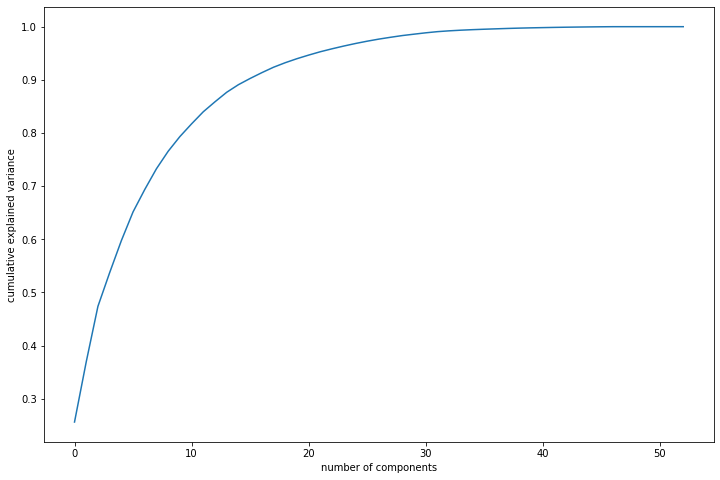

In [204]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We came to know that using 15 components we can see more than 90% of variance is explained.

In [225]:
pca_final = IncrementalPCA(n_components=15)
pca_final

IncrementalPCA(n_components=15)

In [226]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape


(18974, 15)

In [207]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

In [208]:
corrmat

array([[ 1.00000000e+00,  5.02613970e-04, -3.30779922e-04,
        -2.43808944e-04,  2.45836195e-04, -4.06891292e-04,
        -9.99628610e-04,  5.63578911e-04,  1.88936416e-03,
        -2.70626346e-04,  7.06488110e-04, -3.71494262e-07,
         6.64738690e-04,  1.13088552e-03, -2.08157112e-04],
       [ 5.02613970e-04,  1.00000000e+00, -8.34281281e-05,
        -3.20343369e-06,  8.73358768e-05, -2.57924189e-04,
        -3.38528319e-04,  2.59302449e-04,  7.89061102e-04,
        -1.23821591e-04,  1.18519721e-04, -2.40690091e-04,
         1.03147668e-04,  9.79334156e-04, -2.82696820e-05],
       [-3.30779922e-04, -8.34281281e-05,  1.00000000e+00,
         1.67872354e-04, -6.68328433e-05,  8.59231537e-05,
         3.78284825e-04, -2.69776873e-05, -4.41161045e-04,
         1.08197280e-04, -1.04600685e-04, -9.12987524e-05,
        -3.86215188e-04,  9.74607521e-04,  2.40161048e-04],
       [-2.43808944e-04, -3.20343369e-06,  1.67872354e-04,
         1.00000000e+00, -7.53418561e-05,  7.76333494

<AxesSubplot:>

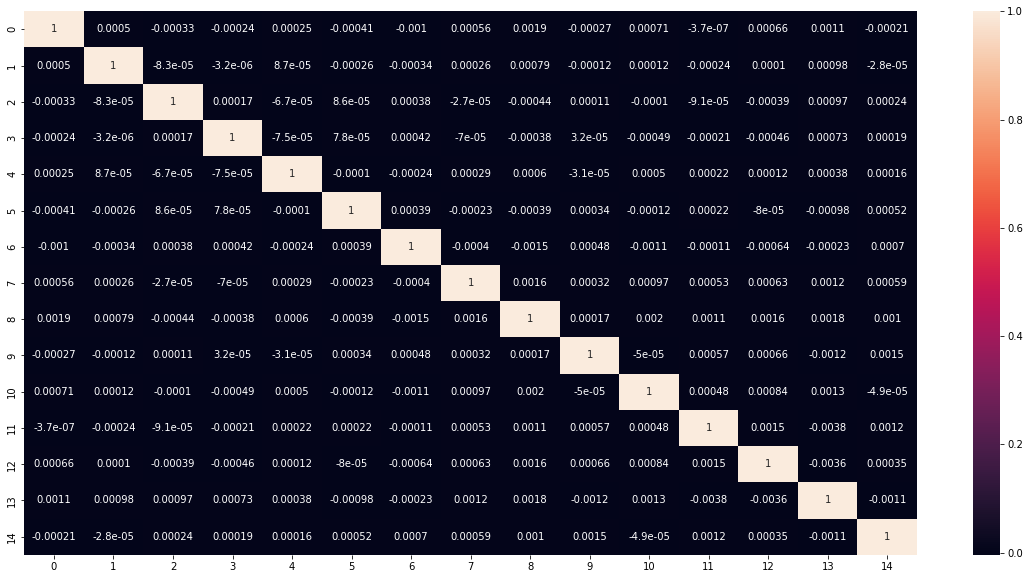

In [209]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_pca.transpose()), annot=True)

In [210]:
# 1s -> 0s in diagonals
corrmat_diag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_diag.max(), ", min corr: ", corrmat_diag.min(),)

max corr: 0.001951379068297344 , min corr:  -0.0038466859640738237


In [82]:
#Applying selected components to the test data - 15 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(4358, 15)

## Logistic Regression Model

In [227]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca,y_train)
model_pca

LogisticRegression()

In [228]:
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
y_train_pred

array([0.01257212, 0.02706537, 0.93067336, ..., 0.32456708, 0.9514329 ,
       0.2380961 ])

In [85]:
y_train_pred_final = pd.DataFrame({'churn_probability':y_train, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,churn_probability,Churn_Prob
0,0,0.012572
1,0,0.027065
2,1,0.930673
3,0,0.010750
4,0,0.429918


In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn_probability,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.012572,1,0,0,0,0,0,0,0,0,0
1,0,0.027065,1,0,0,0,0,0,0,0,0,0
2,1,0.930673,1,1,1,1,1,1,1,1,1,1
3,0,0.010750,1,0,0,0,0,0,0,0,0,0
4,0,0.429918,1,1,1,1,1,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.672447  0.974281  0.370612
0.2   0.2  0.751133  0.944239  0.558027
0.3   0.3  0.799568  0.904501  0.694635
0.4   0.4  0.831717  0.856119  0.807315
0.5   0.5  0.845051  0.800991  0.889111
0.6   0.6  0.844577  0.757352  0.931801
0.7   0.7  0.831717  0.704332  0.959102
0.8   0.8  0.801412  0.626015  0.976810
0.9   0.9  0.760936  0.535575  0.986297


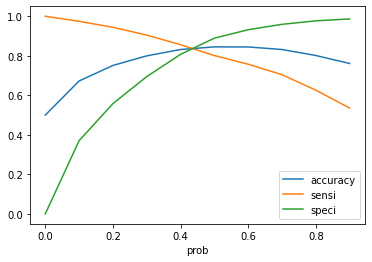

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [89]:
## 0.10 is optimal value
y_train_pred_final['final_churn_pred'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,churn_probability,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_churn_pred
0,0,0.012572,1,0,0,0,0,0,0,0,0,0,0
1,0,0.027065,1,0,0,0,0,0,0,0,0,0,0
2,1,0.930673,1,1,1,1,1,1,1,1,1,1,1
3,0,0.010750,1,0,0,0,0,0,0,0,0,0,0
4,0,0.429918,1,1,1,1,1,0,0,0,0,0,0


In [90]:
confusion = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final.final_churn_pred)
confusion

array([[8123, 1364],
       [1656, 7831]], dtype=int64)

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final.final_churn_pred)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100


82.54

In [93]:
# Negative predictive value
round(TN / float(TN+ FN), 4) * 100

83.07

In [94]:
##Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.churn_probability, y_train_pred_final.final_churn_pred), 4) * 100

84.08

In [95]:
# Positive predictive value 
round(TP / float(TP+ FP), 4) * 100

85.17

In [96]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
y_test_df=pd.DataFrame(y_test)
y_pred_df=pd.DataFrame(pred_probs_test)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_pred_final=pd.concat([y_test_df, y_pred_df],axis=1)


In [97]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Churn_prob'})
y_test_pred_final.head()


,churn_probability,Churn_prob
0,0,0.830558
1,0,0.481155
2,0,0.855222
3,0,0.483290
4,0,0.352891


In [98]:
#y_test_pred_final.head()
y_test_pred_final['final_churn_pred'] = y_test_pred_final.Churn_prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_pred_final.head()

,churn_probability,Churn_prob,final_churn_pred
0,0,0.830558,1
1,0,0.481155,1
2,0,0.855222,1
3,0,0.483290,1
4,0,0.352891,0


In [99]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.churn_probability, y_test_pred_final.final_churn_pred )
confusion2

array([[1608, 2436],
       [  42,  272]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8662420382165605

In [102]:
# Positive predictive value 
print (TP / float(TP+FP))

0.10044313146233383


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9745454545454545


In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, pred_probs_test, drop_intermediate = False )

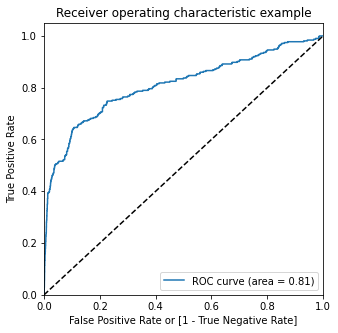

In [106]:
draw_roc(y_test, pred_probs_test)

#### Using Random Forest Model

In [107]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [108]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [109]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [110]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4044
           1       0.31      0.42      0.36       314

    accuracy                           0.89      4358
   macro avg       0.63      0.68      0.65      4358
weighted avg       0.91      0.89      0.90      4358



In [111]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [3, 6]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [3, 6],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [112]:
# printing the optimal accuracy score and hyperparameters
print('We can get best score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get best score of 0.933854181885708 using {'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [113]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=200)

In [114]:
# fit
rfc.fit(X_train_pca,y_train)
# predict
predictions = rfc.predict(X_test_pca)

In [115]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4044
           1       0.27      0.55      0.36       314

    accuracy                           0.86      4358
   macro avg       0.61      0.72      0.64      4358
weighted avg       0.91      0.86      0.88      4358



In [116]:
gb = GradientBoostingClassifier(random_state=100) # default 
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [117]:
# Fit the model to our train and target
gb.fit(X_train_pca, y_train)
# Get our predictions
gb_predictions = gb.predict(X_test_pca)

In [118]:
accuracy_score(y_test, gb_predictions)

0.8295089490592015

In [119]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [120]:
# Fit the model to our train and target
xgb_cfl.fit(X_train_pca, y_train)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_pca)

[19:31:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [121]:
accuracy_score(y_test, xgb_predictions)

0.8611748508490134

#### HPT - Random Search

In [122]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 50

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy',
                                   n_jobs=-1, cv=3, verbose=3, random_state=42)


In [123]:
random_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[19:55:21] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           tree_method='exact',
                                           validate_parameters=1,
       

In [124]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1.5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

 Best accuracy for 3-fold search with 50 parameter combinations:
0.9308533732673655

 Best hyperparameters:
{'subsample': 0.6, 'n_estimators': 750, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [125]:
xgb_predictions_hpt = random_search.predict(X_test_pca)
accuracy_score(y_test, xgb_predictions_hpt)

0.851537402478201

In [126]:
# Let's check the report of our default model
print(classification_report(y_test,xgb_predictions_hpt))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      4044
           1       0.24      0.50      0.33       314

    accuracy                           0.85      4358
   macro avg       0.60      0.69      0.62      4358
weighted avg       0.91      0.85      0.87      4358

